# Random Forest ( Company DataSet ) 

### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

# ============================================================= 

# 1.  <u>Data Description : 

## Let’s consider a Company dataset with around 10 variables and 400 records. 

## The attributes are as follows: 

**Sales --** Unit sales (in thousands) at each location

**Competitor Price --** Price charged by competitor at each location

**Income --** Community income level (in thousands of dollars)

**Advertising --** Local advertising budget for company at each location (in thousands of dollars)

**Population --** Population size in region (in thousands)

**Price --** Price company charges for car seats at each site

**Shelf Location at stores --** A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

**Age --** Average age of the local population

**Education --** Education level at each location

**Urban --** A factor with levels No and Yes to indicate whether the store is in an urban or rural location

**US --** A factor with levels No and Yes to indicate whether the store is in the US or not 

# 2. <u> Import Neccesery Libraries -  

In [69]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.feature_selection import SelectFromModel

# 2. <u>Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 3.<u>Import Dataset -  

In [3]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# 4. <u> EDA -  

In [4]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.duplicated().sum()

0

In [6]:
company_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [7]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# 5. <u> Data Visualization -  

In [8]:
corr = company_data.corr()
corr 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


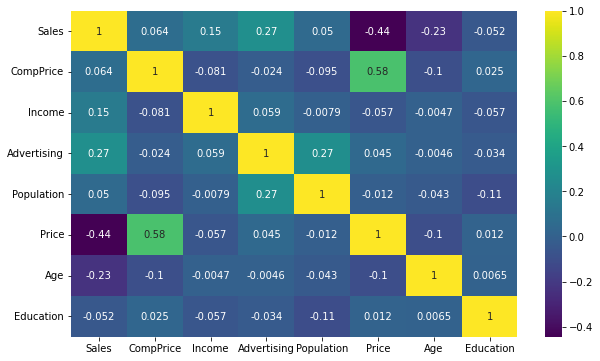

In [9]:
plt.figure(figsize = (10, 6))
sns.heatmap(corr,annot=True, cmap = 'viridis')
plt.show()

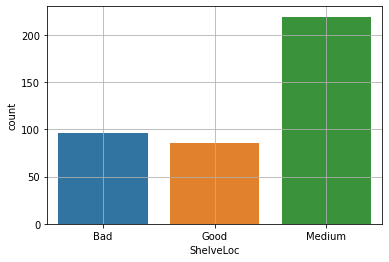

In [10]:
sns.countplot(company_data['ShelveLoc'])
plt.grid(True)
plt.show()

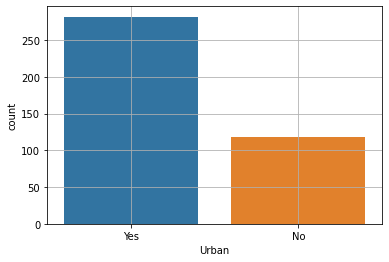

In [11]:
sns.countplot(company_data['Urban'])
plt.grid(True)
plt.show()

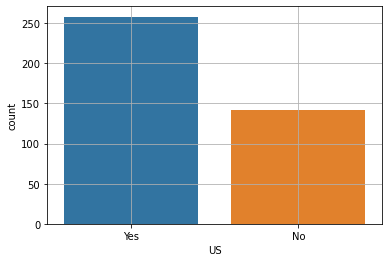

In [12]:
sns.countplot(company_data['US'])
plt.grid(True)
plt.show()

# 6. <u> Data Preparationn - 

## Converting Target variable 'Sales' into categories Low, Medium and High. 

In [13]:
company_data['Sales'].max()

16.27

In [14]:
company_data['Sales'] = pd.cut(x=company_data['Sales'],bins=[0,6,12,17], labels=['Low','Medium', 'High'], right = False)
company_data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

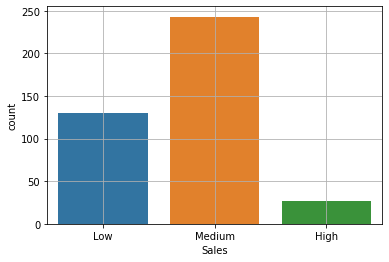

In [15]:
sns.countplot(company_data['Sales'])
plt.grid(True)
plt.show()

In [16]:
company_data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [17]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


## Encoding categorical company data - 

In [21]:
label_encoder =LabelEncoder()

In [22]:
company_data['Sales'] = label_encoder.fit_transform(company_data['Sales'])
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])

company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


# 7. <u> Model Building -  

In [37]:
X = company_data.drop('Sales', axis = 1)
y = company_data[['Sales']]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 42)
print('x_train_shape :',x_train.shape ,'\n y_train_shape :',y_train.shape)

x_train_shape : (280, 10) 
 y_train_shape : (280, 1)


In [39]:
print('x_test_shape :',x_test.shape ,'\n y_test_shape :',y_test.shape)

x_test_shape : (120, 10) 
 y_test_shape : (120, 1)


# 8. <u> Model Training - 

In [40]:
random_model = RandomForestClassifier()
random_model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred = random_model.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred)

0.7083333333333334

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.70      0.56      0.62        34
           2       0.71      0.89      0.79        74

    accuracy                           0.71       120
   macro avg       0.47      0.48      0.47       120
weighted avg       0.64      0.71      0.66       120



In [44]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0, 12],
       [ 0, 19, 15],
       [ 0,  8, 66]], dtype=int64)

In [65]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = random_model,
                           param_grid = {'criterion':['gini','entropy'],
                                         'max_depth':[3,4,5,6,7,8,9]},
                           cv = 5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9]})

In [66]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [67]:
grid_search.best_score_

0.75

In [68]:
random_model_cv=RandomForestClassifier(max_depth=8,min_samples_leaf=1)
random_model_cv.fit(x_train,y_train)
y_pred=random_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7083333333333334


# 9. <u> Feature Selection Technique - 

In [87]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier())
rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier())

In [88]:
rfe.get_support()

array([ True,  True, False,  True,  True,  True, False, False, False,
       False])

In [89]:
rfe_features = x_train.columns[rfe.get_support()]
rfe_features

Index(['CompPrice', 'Income', 'Population', 'Price', 'ShelveLoc'], dtype='object')

In [90]:
x_train_transform_rfe = rfe.transform(x_train)
x_test_transform_rfe = rfe.transform(x_test)

In [91]:
rfe_model = RandomForestClassifier()
rfe_model.fit(x_train_transform_rfe,y_train)

RandomForestClassifier()

In [92]:
y_pred_rfe = rfe_model.predict(x_test_transform_rfe)

In [93]:
print('accuracy score is ',accuracy_score(y_test,y_pred_rfe))
print('Confusion matrix is \n',confusion_matrix(y_test,y_pred_rfe))
print('classification report \n',classification_report(y_test,y_pred_rfe))

accuracy score is  0.6916666666666667
Confusion matrix is 
 [[ 0  1 11]
 [ 0 22 12]
 [ 0 13 61]]
classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.61      0.65      0.63        34
           2       0.73      0.82      0.77        74

    accuracy                           0.69       120
   macro avg       0.45      0.49      0.47       120
weighted avg       0.62      0.69      0.65       120



In [94]:
imp_feature_rfe=rfe_model.feature_importances_

In [95]:
rfe_data=pd.DataFrame({'feature':rfe_features,'imp_feature':imp_feature_rfe})
rfe_data=rfe_data.sort_values('imp_feature')

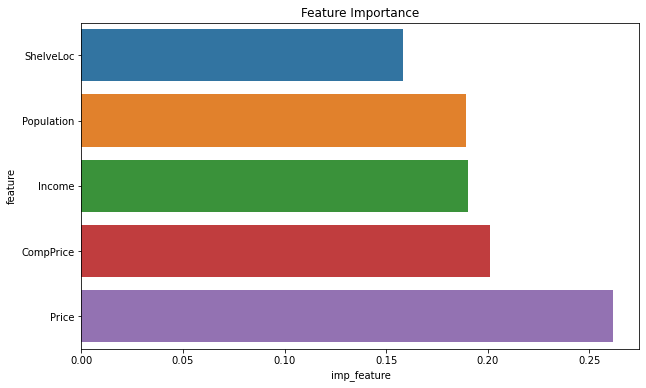

In [96]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=rfe_data)
plt.show()